## there is a plot for task1

## here we could draw n*m figure about different \{mu} and \{scale}

scales_values ['1, 1, 1', '1, 10, 1', '1, 50, 1', '1, 100, 1']
(4, 4001)


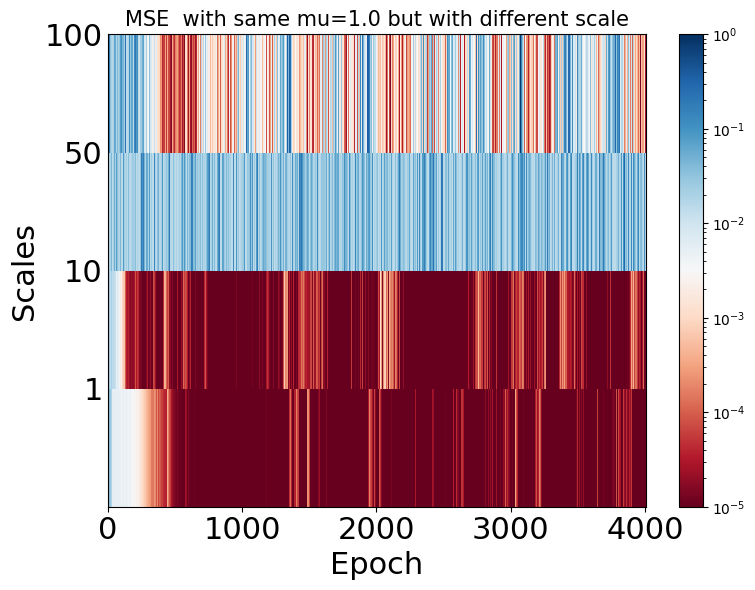

In [8]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
mu_list= set() #不可重复
scales_list = set()
dict_data={"loss_dict":{},"mse_dict":{}}
def extract_params(folder_name):
    # 正则表达式匹配 mu 和 normal 参数
    mu_match = re.search(r'mu=(\d+\.?\d*)', folder_name)
    normal_match = re.search(r'normal--(\d+_\d+_\d+)', folder_name)

    mu = float(mu_match.group(1)) if mu_match else None
    normal = normal_match.group(1).replace('_', ', ') if normal_match else None
    return mu, normal


def plot_param_variation(path, file_name=None, mu_list=None, scales_list=None):
    # 遍历给定路径下的所有文件夹
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)

        if os.path.isdir(folder_path):
            mu, scale = extract_params(folder)

            if mu is not None and scale is not None:

                mu_list.add(mu)
                scales_list.add(scale)

                # 读取数据
                for index,file in enumerate(file_name):

                    index_path = os.path.join(folder_path, file)
                    if os.path.exists(index_path):
                        data = np.load(index_path)
                        dict_key = "loss_dict" if file == "loss.npy" else "mse_dict"
                        dict_data[dict_key][(mu, scale)] = data  # shape (epoch,)



    # 将参数值排序
    mu_values = sorted(list(mu_list))
    scales_values = sorted(list(scales_list), key=lambda x: [int(n) for n in x.split(', ')])
    print("scales_values",scales_values)
    #plt_mu_scale(mu_values,scales_values,type=file_name)
    plt_heat_map(mu_values[0],scales_values)
from matplotlib.colors import LogNorm
def plt_heat_map(mu=1,scales_values=None):#mse

    mse_data=[]
    plt.figure(figsize=(8, 6))
    for scale in scales_values:
        key=(mu,scale)
        mse_data.append(dict_data["mse_dict"][key])
    # 当所有数据都追加完后，将列表转换为NumPy数组
    mse_data = np.array(mse_data)
    print(mse_data.shape) #(4,4001)

    plt.pcolor(mse_data, cmap='RdBu', norm=LogNorm(vmin=1e-5, vmax=1), linewidths=0.4)
    plt.colorbar()
    plt.xlabel('Epoch', fontsize=22)
    plt.ylabel('Scales', fontsize=22)
    # Set the y-axis ticks and labels to 1, 2, 3, and rotate the labels
    plt.yticks([1,2,3,4], [1,10,50,100], rotation=0, fontsize=22)

    # Set the y-axis tick parameters to hide the tick marks and set the tick label size
    plt.gca().yaxis.set_tick_params(size=0)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)


    plt.title(f'MSE  with same mu={mu} but with different scale', fontsize=15)
    plt.tight_layout()
    plt.savefig("./result/task1_fig"+f"/task_1_scale_compare_with_mu{mu}.png")

def plt_mu_scale(mu_values,scales_values,type="NONE"):
      # 绘图
    fig_width = 8 * len(scales_values) # 每列的宽度增加
    plt.figure(figsize=(fig_width, len(mu_values) * 3.5))

    for i, mu in enumerate(mu_values, 1):
        for j, scale in enumerate(scales_values, 1):#index from 1

             key=(mu,scale)
             plt.subplot(len(mu_values), len(scales_values),
                         (i - 1) *len(scales_values) + j)
             plt.semilogy(dict_data["loss_dict"][key],label='ms2_loss4compare',color='orange')
             plt.semilogy(dict_data["mse_dict"][key],label='ms2_mse4compare',color='g',alpha=0.5)
             plt.legend()
             plt.title(f'comparison of mu={mu}, scales={scale}')



    plt.tight_layout()
    plt.savefig("./result/task1_fig"+"/task_1_loss_compare.png")

# 调用函数
plot_param_variation('/Users/liangaoming/Desktop/neural_study/lulu_ms/result',
                     file_name=["loss.npy","mse.npy"],
                     mu_list=mu_list,
                     scales_list=scales_list)






(0, 1000)